# VOTING CLASSIFIER

In [1]:
!pip install mkl
from sklearnex import patch_sklearn
patch_sklearn()
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 18.6 MB/s eta 0:00:0000:0100:01


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
!pip install pandas
!pip install numpy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cf_matrix

In [4]:
df=pd.read_csv('/kaggle/input/water-quality-prediction/dataset.csv')


# PREPROCESSING

In [5]:
# Define the list of numerical and categorical columns
categorical_cols= ['Color', 'Source', 'Month']
numerical_cols  = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids',
       'Water Temperature', 'Air Temperature', 'Day', 'Time of Day',
       'Target']
# Separate numerical and categorical variables
numerical_data = df[numerical_cols]
categorical_data = df[categorical_cols]

In [6]:
def convert_categorical_to_numeric(df, categorical_cols):
    le = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    return df

df_encoded = convert_categorical_to_numeric(df, categorical_cols)

# Print the encoded values of the categorical columns
for col in categorical_cols:
    print(col, df_encoded[col].unique())
def replace_invalid_values_with_mean(df, numerical_cols):
    for col in numerical_cols:
        if df[col].dtype != np.number:
            continue
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)
    return df

Color [0 1 2 3 4 5]
Source [8 2 4 1 5 6 0 3 7]
Month [ 4  9  0  6  7 11  8  5  1 10  2  3 12]


In [7]:
df.dropna(inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# VOTING CLASSIFIER

In [20]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('decision_tree', clf),
        ('random_forest', rf),
    ],
    voting='soft' 
)

In [21]:
# Fit the ensemble model to the training data
ensemble_model.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('decision_tree', DecisionTreeClassifier()),
                             ('random_forest',
                              RandomForestClassifier(random_state=42))],
                 voting='soft')

In [22]:
# Make predictions on the test data
ensemble_predictions = ensemble_model.predict(X_test_scaled)

# Calculate the accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Model Accuracy:", ensemble_accuracy)

Ensemble Model Accuracy: 0.9995117371577144


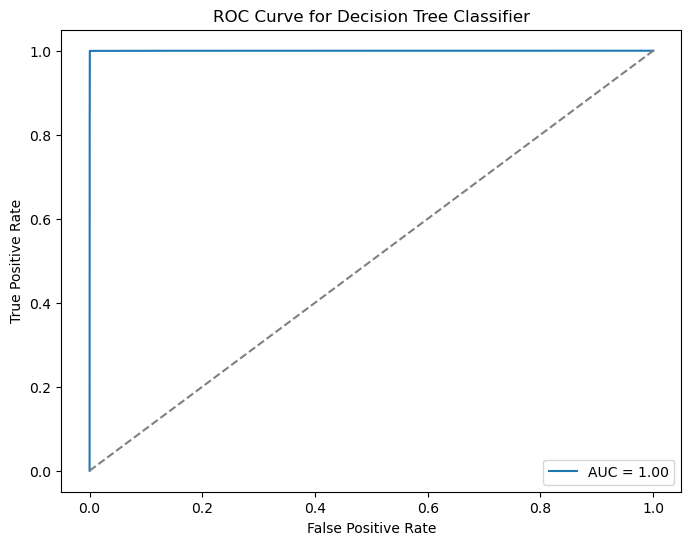

In [23]:
# Calculate ROC curve and AUC
y_scores = ensemble_model.predict_proba(X_test_scaled)[:, 1]  # Use predict_proba for Decision Trees
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend()
plt.show()